Name: Christian Hellum Bye

# Predicting a Pulsar Star

In this deliverable, we will compare different classification algortihms to see which ones perform best on our data. We will then pick one as our final model and create an outline to a final poster presentation.

Following the work from deliverable 2, we will first try to improve the Support Vector Machine model and then see how it compares to a k-NN algortihm and a random forest.

## Preprocessing the data

This section follows the work from deliverable 2.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split #to split the dataset

In [8]:
data = np.loadtxt('pulsar_stars.csv', delimiter=',', skiprows=1)

In [9]:
X = data[:, 0:8] #features
y = data[:, 8] #classes

In [109]:
#split the dataset into two parts, 80 % containing training and validation sets, 20 % to the test set
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2)

#split the larger part of the dataset to two parts: 75 % (= 60 % of the total data) to training set, 25 % (= 20 % of the total)
#to the validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25)

## Models

### Support Vector Machine

As explained in deliverable 2, the hyperparameters for this algorithm are: regularization method ('penalty'), loss function ('loss') and regularization parameter ('C'). 

In deliverable 2, the parameters were set like this:

* penalty = 'l2' (ridge regularization)
* loss = 'squared_hinge' (a squared hinge loss function)
* C = 100

These parameters gave us the following f1-scores:
* Training: 0.879
* Validation: 0.889
* Test: 0.865

We will now test different combinations of hyperparameters to optimize the model. First we will investigate how changing 'penalty' and 'C' affects the f1-score.

In [18]:
#import necessary libraries
from sklearn.svm import LinearSVC #the training algorithm
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

In [76]:
def SVM_f1(penalty, loss, C):
    '''
    This function calculates the f1-scores of the validation and training sets using a SVM with different choices for
    penalty, loss and C.
    '''
    
    #set the parameter dual to match input parameters
    if penalty == 'l2' and loss == 'hinge':
        dual = True
    else:
        dual = False
        
    svm_clf = LinearSVC(penalty=penalty, loss=loss, C=C, class_weight='balanced', dual=dual) #set hyperparameters
    svm_clf.fit(X_train, y_train) #fit the model to the training data
    
    #predict the class labels for the training set and validation set
    train_predict = svm_clf.predict(X_train)
    validation_predict = svm_clf.predict(X_validation)
    
    #compute the f1-scores for the training and validation sets
    f1_train = f1_score(y_train, train_predict)
    f1_validation = f1_score(y_validation, validation_predict)
    
    return f1_train, f1_validation

Using squared hinge loss function and Lasso regularization (L1), we will plot f1-score vs C for C = 2, 4, 6, ..., 200:

In [108]:
SVM_f1_train_l1_squared = np.empty(100) #f1-scores for training data using l1 regularization and squared hinge loss
SVM_f1_validation_l1_squared = np.empty(100) #validation data
C_vals = 2*np.arange(1,101) #values of C

for i in range(100):
    C = C_vals[i]
    SVM_f1_train_l1_squared[i], SVM_f1_validation_l1_squared[i] = SVM_f1(penalty='l1', loss='squared_hinge', C=C) 

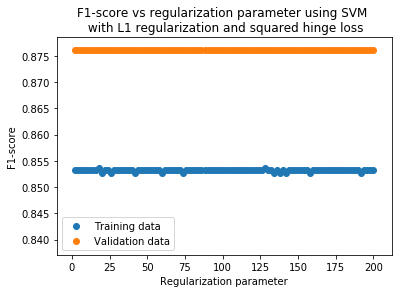

In [110]:
plt.figure()
plt.scatter(C_vals, SVM_f1_train_l1_squared, label = 'Training data')
plt.scatter(C_vals, SVM_f1_validation_l1_squared, label = 'Validation data')
plt.legend()
plt.title('F1-score vs regularization parameter using SVM \n with L1 regularization and squared hinge loss')
plt.xlabel('Regularization parameter')
plt.ylabel('F1-score')
plt.show()

We see that the choice of C has essentially no impact on the f1-score. Changing C to something much larger also seems to have almost no impact:

In [111]:
SVM_f1(penalty='l1', loss='squared_hinge', C = 1)

(0.847457627118644, 0.8389830508474576)

In [112]:
SVM_f1(penalty='l1', loss='squared_hinge', C = 10)

(0.8469147432878004, 0.8389830508474576)

In [113]:
SVM_f1(penalty='l1', loss='squared_hinge', C = 1000)

(0.847457627118644, 0.8389830508474576)

In [114]:
SVM_f1(penalty='l1', loss='squared_hinge', C = 10000)

(0.847457627118644, 0.8389830508474576)

We now look at Ridge regularization:

In [115]:
SVM_f1_train_l2_squared = np.empty(100) #f1-scores for training data
SVM_f1_validation_l2_squared = np.empty(100) #f1-scores for validation data

for i in range(100):
    C = C_vals[i]
    SVM_f1_train_l2_squared[i], SVM_f1_validation_l2_squared[i] = SVM_f1(penalty='l2', loss='squared_hinge', C=C) 

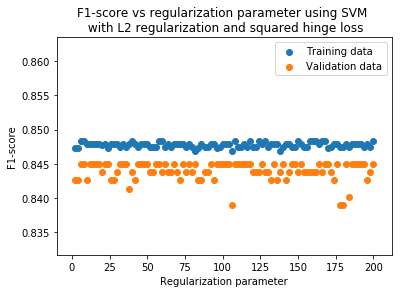

In [116]:
plt.figure()
plt.scatter(C_vals, SVM_f1_train_l2_squared, label = 'Training data')
plt.scatter(C_vals, SVM_f1_validation_l2_squared, label = 'Validation data')
plt.legend()
plt.title('F1-score vs regularization parameter using SVM \n with L2 regularization and squared hinge loss')
plt.xlabel('Regularization parameter')
plt.ylabel('F1-score')
plt.show()

Also in this case, the regularization parameter is not important for the f1-score.

In [117]:
SVM_f1(penalty='l2', loss='squared_hinge', C = 1)

(0.8477133427628478, 0.8413597733711048)

In [118]:
SVM_f1(penalty='l2', loss='squared_hinge', C = 100)

(0.8478568064060291, 0.844950213371266)

In [119]:
SVM_f1(penalty='l2', loss='squared_hinge', C = 1000)

(0.8478568064060291, 0.8425531914893616)

In [120]:
SVM_f1(penalty='l2', loss='squared_hinge', C = 10000)

(0.8478568064060291, 0.844950213371266)

It seems that the f1-score is almost completely independent of the regularization parameter, but that it depends on the regularization method - Ridge regularization seems to give slightly better scores than Lasso regularization.

We now compare the loss functions squared hinge and hinge using Ridge regularization.

In [121]:
SVM_f1_train_l2_hinge = np.empty(100) #f1-scores for training data using l2 regularization and hinge loss
SVM_f1_validation_l2_hinge = np.empty(100) #validation data

for i in range(100):
    C = C_vals[i]
    SVM_f1_train_l2_hinge[i], SVM_f1_validation_l2_hinge[i] = SVM_f1(penalty='l2', loss='hinge', C=C) 

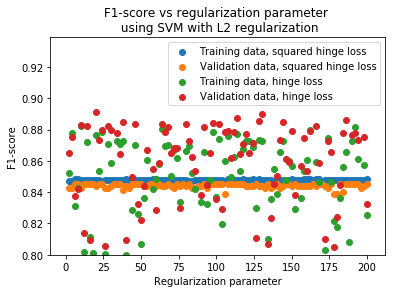

In [122]:
plt.figure()
plt.scatter(C_vals, SVM_f1_train_l2_squared, label = 'Training data, squared hinge loss')
plt.scatter(C_vals, SVM_f1_validation_l2_squared, label = 'Validation data, squared hinge loss')
plt.scatter(C_vals, SVM_f1_train_l2_hinge, label = 'Training data, hinge loss')
plt.scatter(C_vals, SVM_f1_validation_l2_hinge, label = 'Validation data, hinge loss')
plt.legend(loc = 0, bbox_to_anchor = (1,1))
plt.title('F1-score vs regularization parameter \n using SVM with L2 regularization')
plt.xlabel('Regularization parameter')
plt.ylabel('F1-score')
plt.ylim(0.8)
plt.show()

We see that the choice of loss function has a big effect on the f1-scores. Using hinge loss, the regularization parameter suddenly becomes important again, with small changes in the regularization parameter giving large variations in f1-scores.

The choice of hyperparameters that maximize the f1-scores clearly includes using L2 regularization and a hinge loss function. For choosing the value of the regularization parameter, we in principle need to consider two things: what choice maximizes the f1-score of the validation data and what choice minimizes the difference between the f1-scores of the test data and the validation data?

The second question is important to ask to avoid overfitting. However, we only have to worry about overfitting when the scores on the training data are much better than the scores on the validation data. We see that the best validation data scores are better than the best training data scores, so we are not at risk of this happening. Thus, it is enough to pick the best validation data score - but making sure that the training data score is still good (i.e. none of the outliers below ~ 0.85) as that would just lead to overfitting to the validation data.

In [128]:
parameter_index = np.argmax(SVM_f1_validation_l2_hinge) #find the index that maximizes the f1-score using l2 and hinge
C_best = C_vals[parameter_index] #the value of C that maximizes the f1-score

print('The maximum f1-score is', round(SVM_f1_validation_l2_hinge[parameter_index],3), 'which is achieved for C =', C_best, '. The f1-score on the training data for this value of C is', round(SVM_f1_train_l2_hinge[parameter_index],3), '.')

The maximum f1-score is 0.891 which is achieved for C = 20 . The f1-score on the training data for this value of C is 0.876 .


We now test the best model on the test data set:

In [147]:
svm_clf = LinearSVC(penalty='l2', loss='hinge', C=20, class_weight='balanced', dual=True) #set hyperparameters
svm_clf.fit(X_train, y_train) #fit the model to the training data
test_predict = svm_clf.predict(X_test) #the predicted classes for the test data

In [148]:
f1_score(y_test, test_predict)

0.8990228013029317

To summarize:

In deliverable 2, the parameters were set like this:

* penalty = 'l2' (ridge regularization)
* loss = 'squared_hinge' (a squared hinge loss function)
* C = 100

These parameters gave us the following f1-scores:
* Training: 0.879
* Validation: 0.889
* Test: 0.865

Our testing lead us to the following best choice of parameters:

* penalty = 'l2'
* loss = 'hinge'
* C = 20

These parameters gave us the following f1-scores:
* Training: 0.876
* Validation: 0.891
* Test: 0.899

### k-Nearest Neighbours

The only hyperparameter in this case is k, i.e. how many nearest neighbours to consider.

In [150]:
#import necessary module 
from sklearn.neighbors import KNeighborsClassifier 

In [152]:
def f1_knn(k):
    '''
    This function calculates the f1-scores of the validation and training sets using a k-NN algorithm given
    a value of k
    '''
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) #fit the model to training set
    prediction = knn.predict(X_validation)
    f1 = f1_score(y_validation, prediction)
    return f1

In [161]:
k_values = np.arange(1,41) #let k range from 1 to 40
f1_values_knn = np.empty(40)
for i in range(40):
    f1_values_knn[i] = f1_knn(k_values[i])

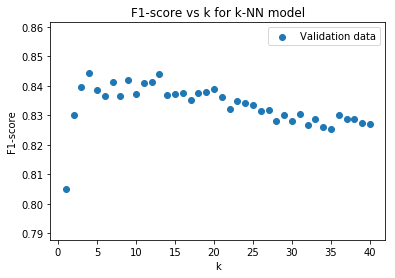

In [162]:
plt.figure()
plt.scatter(k_values, f1_values_knn, label='Validation data')
plt.title('F1-score vs k for k-NN model')
plt.ylabel('F1-score')
plt.xlabel('k')
plt.legend()
plt.show()

We see that it is meaningless to pick k > 4. Moreover, since k should be odd in order to avoid ties (e.g. with k = 4 we are at risk of having two neighbours being class 0 and one neighbour being class 1), we pick k = 3.

With k = 3, we get:

In [163]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) #fit the model to training set
prediction = knn.predict(X_test)
f1_knn = f1_score(y_test, prediction)

print('The f1-score for the 3-NN method is', f1_knn)

The f1-score for the 3-NN method is 0.8486842105263158


### Random forest

In [164]:
from sklearn.ensemble import RandomForestClassifier

We will tune the following hyperparameters:
* n_estimators: number of trees in the forest, we will let this range from 1 to 50
* min_samples_split: minimum number of samples required to split an internal node, we let this range from 2 to 10
* max_features: number of features to consider when looking for the best split, we let this range from 1 to 8

In [175]:
def rfc_f1(n_estimators, min_samples_split, max_features):
    rfc = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split, max_features = max_features, class_weight='balanced')
    rfc.fit(X_train, y_train) #fits to training set
    
    #make predictions
    train_predict = rfc.predict(X_train)
    validation_predict = rfc.predict(X_validation)
    
    rfc_tr_f1 = f1_score(y_train, train_predict) #f1-score for training data
    rfc_validation_f1 = f1_score(y_validation, validation_predict) #f1-score for test data
    
    return rfc_tr_f1, rfc_validation_f1

In [176]:
n_vals = np.arange(1,51) #n_estimators
min_sample_split_vals = np.arange(2,11) #min_sample_split
max_features_vals = np.arange(1,9) #max_features

In [179]:
f1_scores_rfc_train = np.empty((50, 9, 8))
f1_scores_rfc_validation = np.empty((50, 9, 8))
for i in range(50): #loop through values of n_estimators
    print(i)
    for j in range(9): #loop through values of min_sample_split
        for k in range(8): #loop through values of max_features
            f1_scores_rfc_train[i,j,k], f1_scores_rfc_validation[i,j,k] = rfc_f1(n_vals[i], min_sample_split_vals[j], max_features_vals[k])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [193]:
#flatten the arrays
f1_tr = np.ravel(f1_scores_rfc_train)
f1_val = np.ravel(f1_scores_rfc_validation)

In [194]:
np.mean(f1_tr)

0.9762578749995151

The mean of F1-scores is very high for the training data. This can indicate that we might be overfitting.

We find the max f1-score for the validation data.

In [195]:
max_index_rfc = np.argmax(f1_val) #the index corresponding to the greatest f1-score for the validation data

In [196]:
f1_val[rfc_max_index] #the f1-score at this index

0.9028213166144201

In [197]:
f1_tr[rfc_max_index] #the f1-score of the training data at this index

0.9875187219171243

We see that the the choice of parameters corresponding to the max f1-score for the validation data also corresponds to better-than-average f1-score for the training data. Thus we are not overfitting to the validation data.

We have to find what parameters that maximize the f1-score for the validation data. The index in the flattened array is:

In [198]:
print(max_index_rfc)

3195


In [233]:
np.unravel_index(max_index_rfc, f1_scores_rfc_validation.shape)

(44, 3, 3)

The best parameters are:
* n_estimators = 45 (the 0th index has n_estimators = 1)
* min_sample_split = 5 (the 0th index has min_sample_split = 2, so the third has min_sample_split = 5)
* max_features = 4 (the 0th index has max_features = 1)

We test this:

In [277]:
rfc = RandomForestClassifier(n_estimators = 45, min_samples_split = 5, max_features = 4, class_weight='balanced')
rfc.fit(X_train, y_train) #fits to training set
    
test_predict = rfc.predict(X_test) #make predictions
rfc_test_f1 = f1_score(y_test, test_predict) #f1-score for test data

In [278]:
print('Test data:', rfc_test_f1)

Test data: 0.9020866773675763


### Comparison

We get the following results:

F1-scores:
* SVM: 0.899
* kNN: 0.849
* RFC: 0.902

We decide to save the weigths for the SVM and RFC. We will choose RFC as our final model.

In [281]:
import pickle
pickle.dump(svm_clf, open('SVM_weigths.sav', 'wb'))
pickle.dump(rfc, open('RFC_weigths.sav', 'wb'))

The confusion matrix for our model is:

In [282]:
confusion_test = confusion_matrix(y_test, test_predict)
print('Confusion matrix: \n')
print(confusion_test)

tn, fp, fn, tp = confusion_test.ravel()

print('\nTrue positives', tp)
print('True negatives', tn)
print('False positives', fp)
print('False negatives', fn)

Confusion matrix: 

[[3238   21]
 [  40  281]]

True positives 281
True negatives 3238
False positives 21
False negatives 40


## Presenting

The results will be presented with a poster. As a first draft, the poster will include the following:

* Problem statement: similar to what's included in deliverable 2
* Background: motivation for choosing the project, what are pulsars and why does the problem exist
* The data used: description of the data, similar to what's in deliverable 1 and 2
* Methodology: similar to what's in deliverable 1, but also including the process of selecting the final model as descriped in this deliverable
* Results: the f1-scores and confusion matrix from this deliverable
* Discussion: compare the results to baseline performance